In [1]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [2]:
# Binary classification problem with some simulated data
# Model: Dense Neural Network model

In [3]:
# Generate synthetic data
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 42)

In [4]:
print(X.shape)
print(len(y))

(1000, 2)
1000


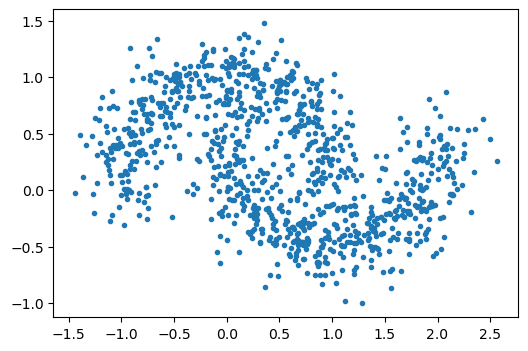

In [6]:
plt.figure(figsize = (6, 4))
plt.plot(X[:, 0], X[:, 1], '.')
plt.show()

In [7]:
print(y[0:10])

[1 1 1 1 0 1 1 1 1 0]


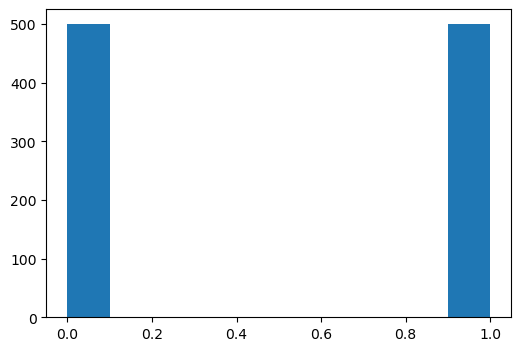

In [8]:
plt.figure(figsize = (6, 4))
plt.hist(y)
plt.show()

In [9]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print(x_train.shape)
print(x_test.shape)

(800, 2)
(200, 2)


In [11]:
def nn_model(shape):
    
    model = Sequential([
        Dense(32, activation = 'relu', input_shape = (shape, )),
        Dense(16, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
    
    return model

In [12]:
shape = X.shape[1]
print(shape)

2


In [13]:
model = nn_model(shape)

In [17]:
epochs = 30
batch_size = 64

In [18]:
# Train the model
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
          validation_data = (x_test, y_test))

Epoch 1/30
13/13 [==============================] - 0s 3ms/step - loss: 0.3267 - accuracy: 0.8550 - val_loss: 0.3287 - val_accuracy: 0.8450
Epoch 2/30
13/13 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8625 - val_loss: 0.3158 - val_accuracy: 0.8500
Epoch 3/30
13/13 [==============================] - 0s 1ms/step - loss: 0.3035 - accuracy: 0.8650 - val_loss: 0.3055 - val_accuracy: 0.8600
Epoch 4/30
13/13 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8700 - val_loss: 0.2952 - val_accuracy: 0.8750
Epoch 5/30
13/13 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.8712 - val_loss: 0.2867 - val_accuracy: 0.8750
Epoch 6/30
13/13 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8725 - val_loss: 0.2798 - val_accuracy: 0.8750
Epoch 7/30
13/13 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.8750 - val_loss: 0.2746 - val_accuracy: 0.8750
Epoch 8/30
13/13 [==

In [19]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

7/7 [==============================] - 0s 820us/step - loss: 0.1771 - accuracy: 0.9350
Test Accuracy: 0.9350000023841858


In [21]:
# Predict the test set results
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 546us/step


In [22]:
print(y_pred[0:10])

[[0.9817834 ]
 [0.28263843]
 [0.9791469 ]
 [0.02674382]
 [0.99030155]
 [0.9884239 ]
 [0.6674301 ]
 [0.7312163 ]
 [0.99608886]
 [0.17347519]]


In [23]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [24]:
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

In [25]:
y_pred_classes

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [26]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

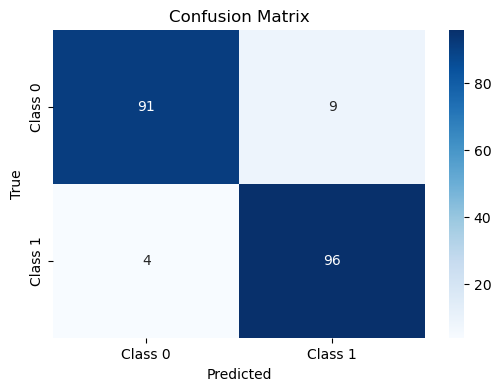

In [27]:
# Plot confusion matrix
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = ['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()